# <center>Proyecto 1</center>

#### ***Nombre***: Jose Eduardo Calderon Lopez
#### ***Carnet***: 14001764

<br>
<hr>
<br>

## Imports necesarios para el proyecto

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Load inicial de datos

In [3]:
# Complete set
dataset = np.load('proyecto_training_data.npy')

In [4]:
filas = len(dataset)

# Training set
trainingData = dataset[:int(filas*0.8)]

# Validation set
validationData = dataset[int(filas*0.8):]

In [5]:
# Columnas de data set
saleprice = trainingData[:,0]
overallquality = trainingData[:,1]
firstfloorsqft = trainingData[:,2]
totalrooms = trainingData[:,3]
yearbuilt = trainingData[:,4]
lotfrontage = trainingData[:,5]

columnas = [saleprice, overallquality, firstfloorsqft, totalrooms, yearbuilt, lotfrontage]

# Labels de columnas de data set
colLabels = ("Sale Price","Overall Quality","First Floor sq ft","Total Rooms","Year built","Lot Frontage");

## Análisis exploratorio

In [277]:
cols = 6

arrMeans = np.zeros(cols)
arrMaxValues = np.zeros(cols)
arrMinValues = np.zeros(cols)
arrStdDevs = np.zeros(cols)
arrRanges = np.zeros(cols)

for i in range(0,cols):
    arrMeans[i] = round(np.nanmean(trainingData[:,i]), 5)
    arrMaxValues[i] = round(np.nanmax(trainingData[:,i]), 5)
    arrMinValues[i] = round(np.nanmin(trainingData[:,i]), 5)
    arrStdDevs[i] = round(np.nanstd(trainingData[:,i]), 5)
arrRanges = list(map(lambda value1, value2: value1-value2, arrMaxValues, arrMinValues))

In [270]:
def printAnalysis(index):
    print(f"Media: {arrMeans[index]}")
    print(f"Valor máximo: {arrMaxValues[index]}")
    print(f"Valor mínimo: {arrMinValues[index]}")
    print(f"Rango: {arrRanges[index]}")
    print(f"Desviación estándar: {arrStdDevs[index]}")

### Sale Price ($)

In [271]:
printAnalysis(0)

Media: 180590.2774
Valor máximo: 755000.0
Valor mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95108


### Overall Quality

In [272]:
printAnalysis(1)

Media: 6.10103
Valor máximo: 10.0
Valor mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.37744


### First Floor sq ft

In [273]:
printAnalysis(2)

Media: 1156.32363
Valor máximo: 3228.0
Valor mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62033


### Total Rooms

In [274]:
printAnalysis(3)

Media: 6.48545
Valor máximo: 14.0
Valor mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.60845


### Construction date

In [275]:
printAnalysis(4)

Media: 1971.4512
Valor máximo: 2010.0
Valor mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.93888


### Lot Frontage

In [276]:
printAnalysis(5)

Media: 69.94699
Valor máximo: 313.0
Valor mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.46595


## Histogramas de variables

In [110]:
def drawHistogram(column, title, xlabel, ylabel, color):
    sb.set(style="darkgrid")
    sb.histplot(trainingData[:,column], color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Sale Price

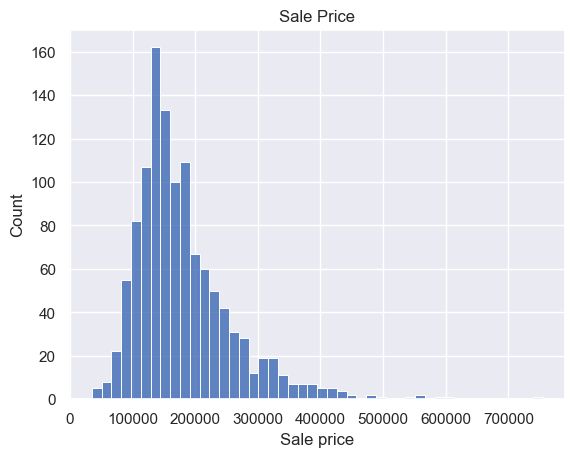

In [111]:
drawHistogram(0, "Sale Price", "SalePrice", "Count", "#3160b0")

### Overall Quality

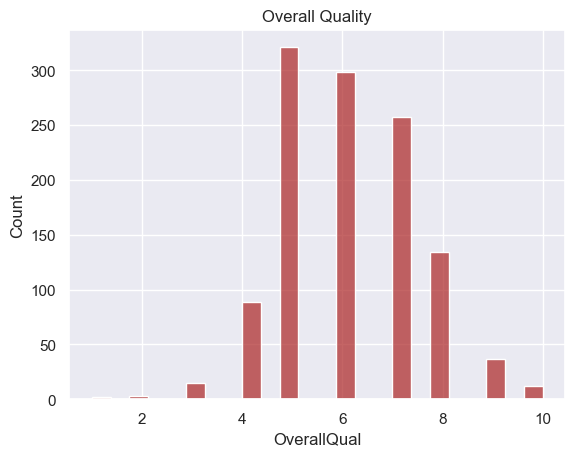

In [114]:
drawHistogram(1, "Overall Quality", "OverallQual", "Count", "#b03131")

### First Floor sq ft

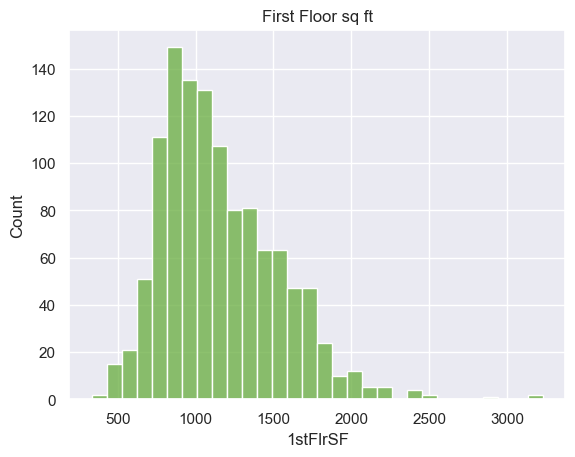

In [115]:
drawHistogram(2, "First Floor sq ft", "1stFlrSF", "Count", "#67ad3e")

### Total Rooms

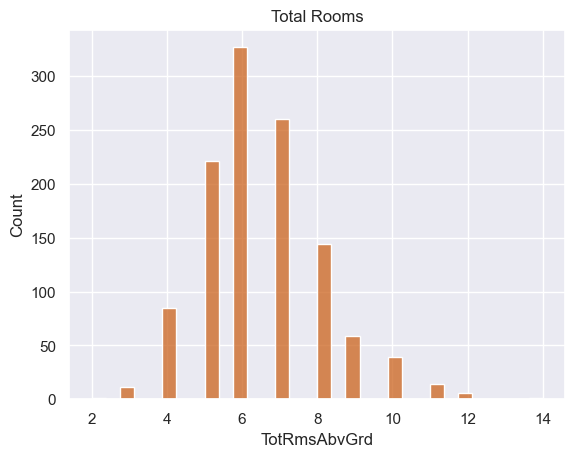

In [123]:
drawHistogram(3, "Total Rooms", "TotRmsAbvGrd", "Count", "#cc631d")

### Construction date

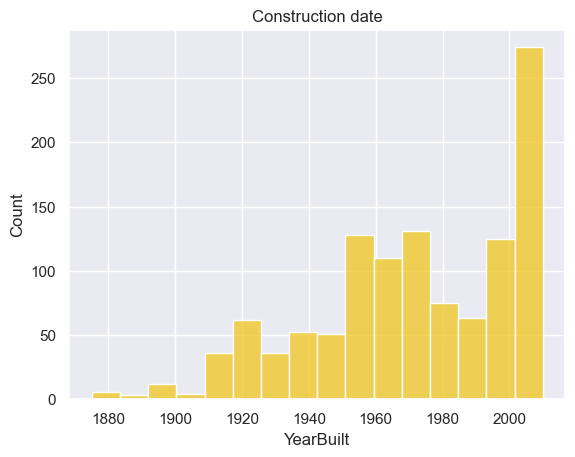

In [125]:
drawHistogram(4, "Construction date", "YearBuilt", "Count", "#f2c51f")

### Lot Frontage

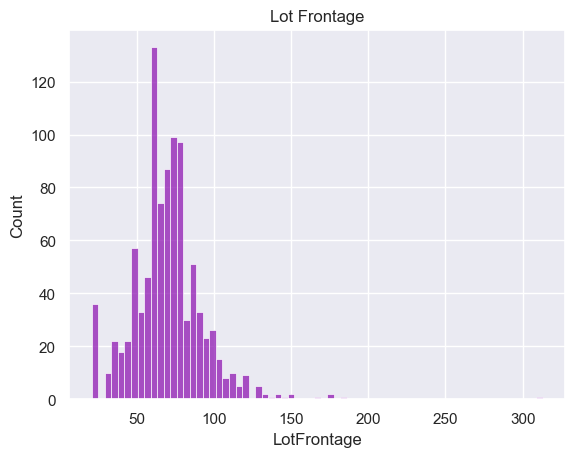

In [124]:
drawHistogram(5, "Lot Frontage", "LotFrontage", "Count", "#8f19b3")

## Correlaciones

In [10]:
# Funcion que calcula el coeficiente de correlacion x vs y
def coefCorr(x,y):
    # return np.corrcoef(x,y)[0][1]
    return np.ma.corrcoef(np.ma.masked_invalid(x),np.ma.masked_invalid(y))[0][1]


# Funcion que despliega los valores de x, y, r
def printxyr(labelx, labely, r):
    print(f"x = {labelx}")
    print(f"y = {labely}")
    print(f"r = {r}\n")
    
    
# Funcion que dibuja grafica scatterplot de x vs y
def printScatterPlot(x,y, labelx, labely, r):
    
    # Informacion
    plt.title(f"{labelx} vs {labely} (r={r})")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.scatter(x,y, alpha=0.5)
    
    # Asepcto
    plt.rcParams['grid.alpha'] = 0.75
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)
    
    # Desplegar
    plt.show()
    print("\n")

    
def printCorrelations(columnaX, labelIndex):
    
    # Calculo de coeficientes de correlacion
    coeficientes = np.zeros(6)
    for i, columnaY in enumerate(columnas):
        coeficientes[i] = round(coefCorr(columnaX, columnaY), 5)    
    
    
    # Grafica de x vs y
    for i,r in enumerate(coeficientes):
        if(labelIndex != i):
            labelx = colLabels[labelIndex]
            labely = colLabels[i]
            printScatterPlot(columnaX,columnas[i],labelx,labely,r)
            # printxyr(labelx, labely, r)
    
    
    # Calcular variables con mayor correlacion (se obvia el 1)
    sortedCoeficientes = sorted(coeficientes)
    c1 = sortedCoeficientes[-2]
    c2 = sortedCoeficientes[-3]
    
    indexC1 = np.where(coeficientes == c1)[0][0]
    indexC2 = np.where(coeficientes == c2)[0][0]
    
    labelC1 = colLabels[indexC1]
    labelC2 = colLabels[indexC2]
    
    print("Variables con mayor correlación:")
    printxyr(colLabels[labelIndex], labelC1, c1)
    printxyr(colLabels[labelIndex], labelC2, c2)
    

### Sale Price

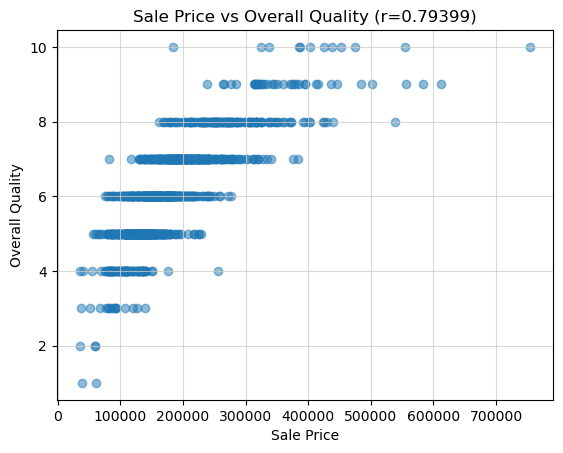

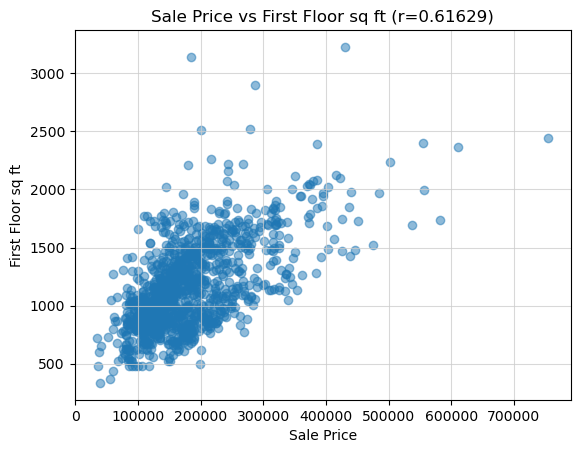

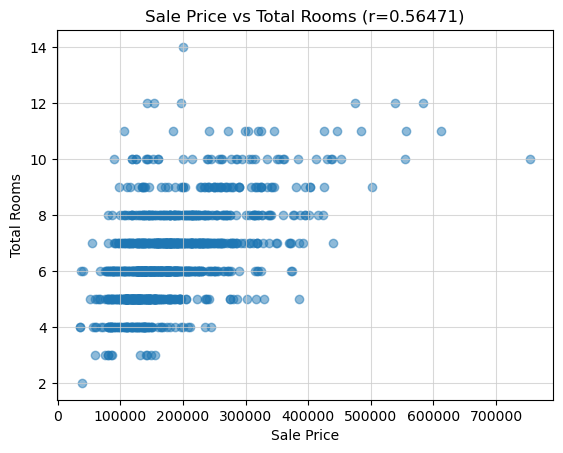

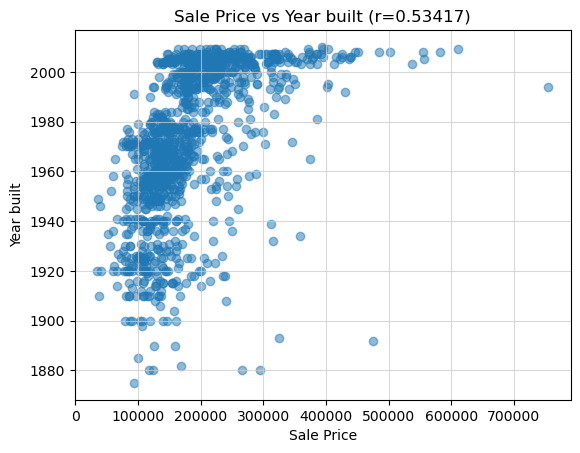

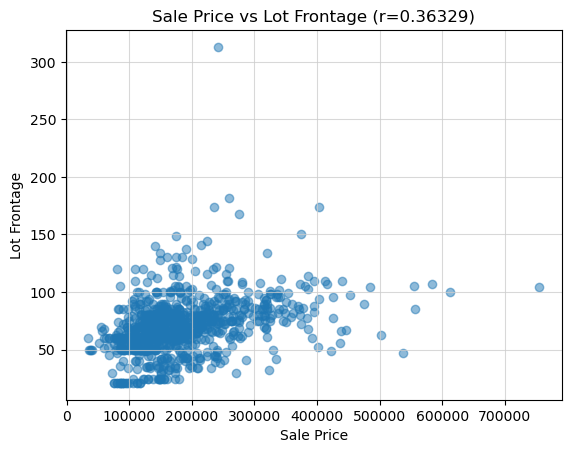



Variables con mayor correlación:
x = Sale Price
y = Overall Quality
r = 0.79399

x = Sale Price
y = First Floor sq ft
r = 0.61629



In [107]:
printCorrelations(saleprice,0)

### Overall Quality

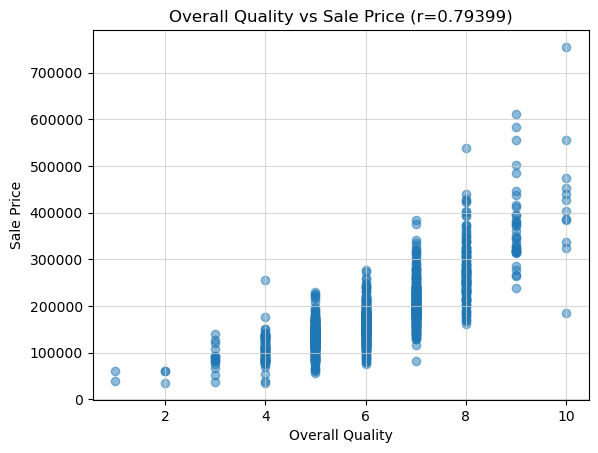

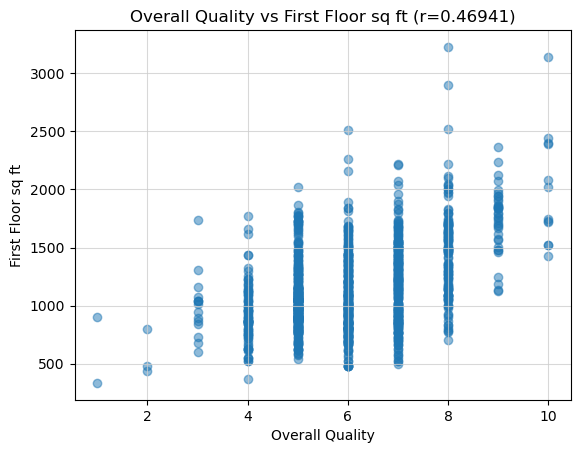

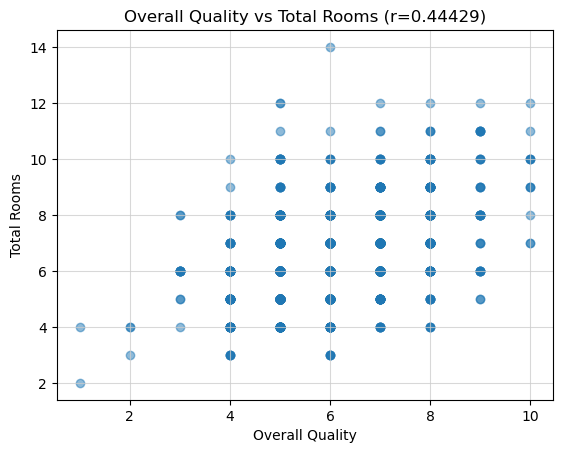

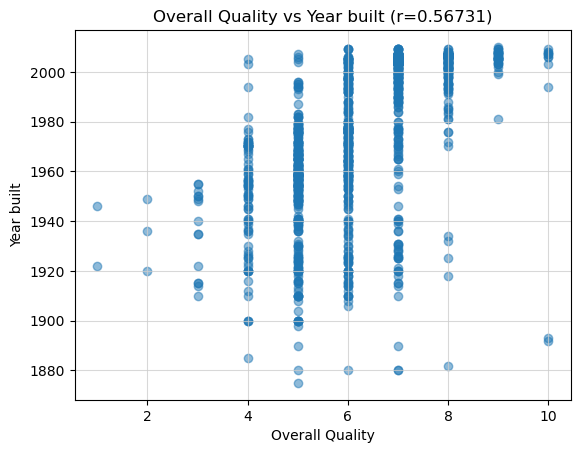

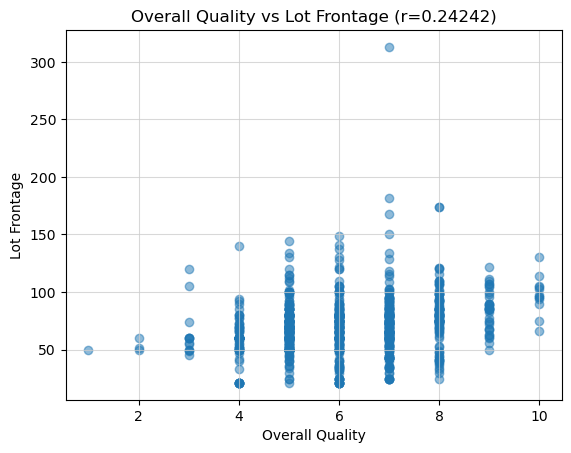



Variables con mayor correlación:
x = Overall Quality
y = Sale Price
r = 0.79399

x = Overall Quality
y = Year built
r = 0.56731



In [108]:
printCorrelations(overallquality, 1)

### First Floor sq ft

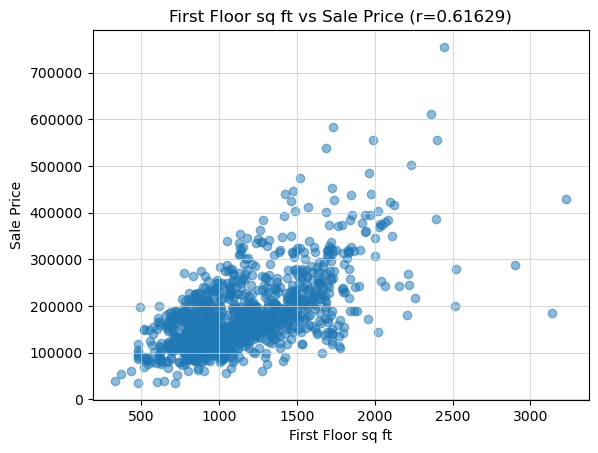

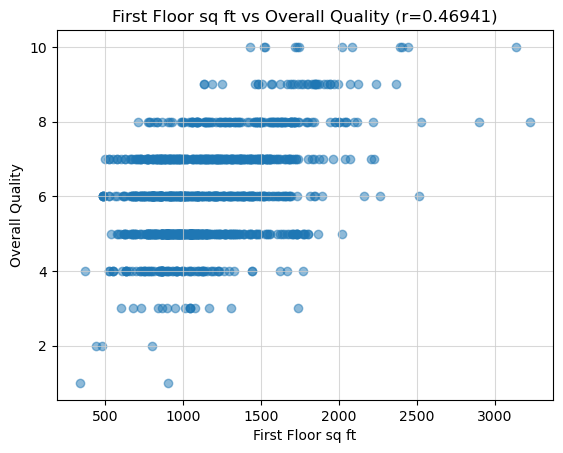

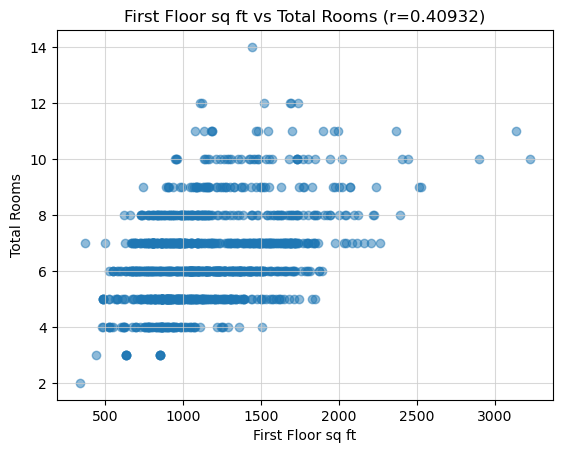

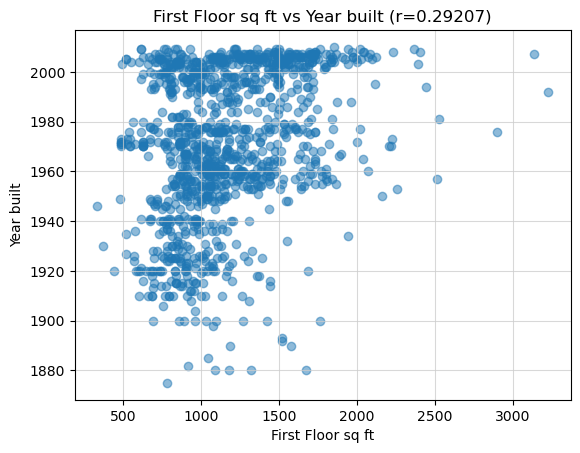

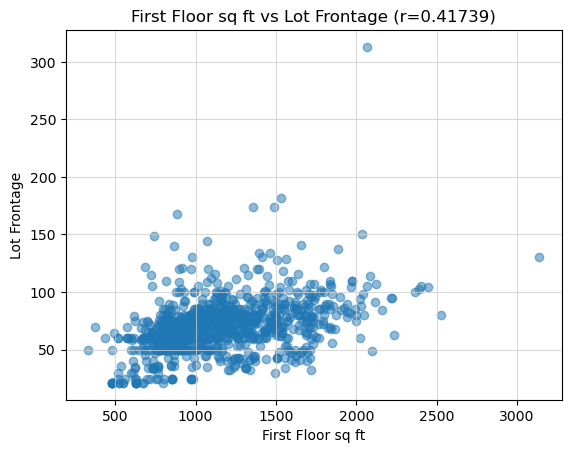



Variables con mayor correlación:
x = First Floor sq ft
y = Sale Price
r = 0.61629

x = First Floor sq ft
y = Overall Quality
r = 0.46941



In [109]:
printCorrelations(firstfloorsqft,2)

### Total Rooms

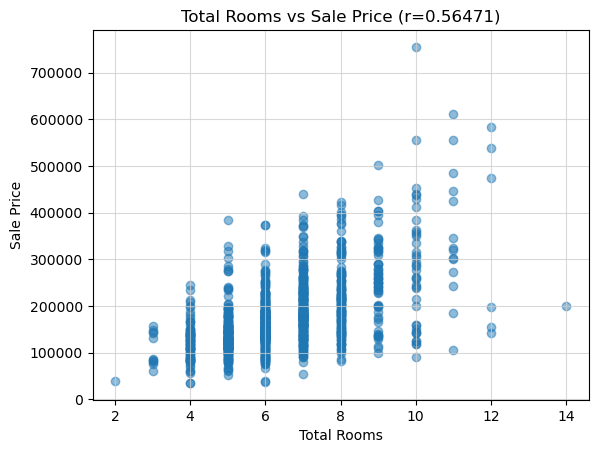

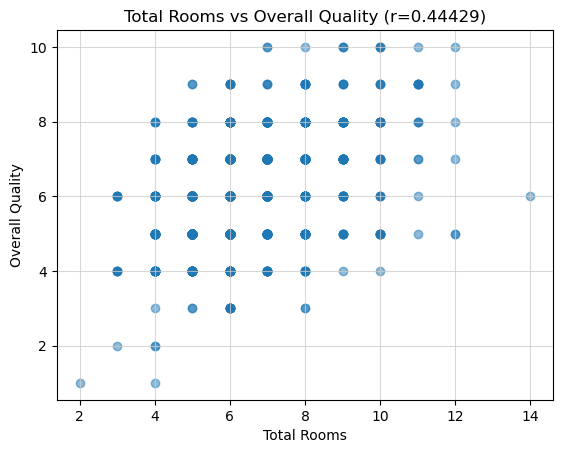

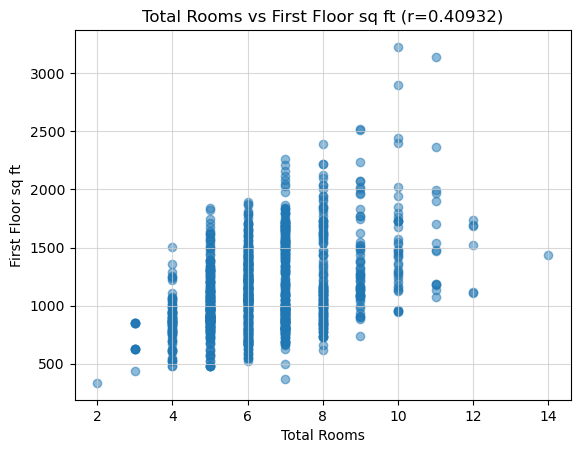

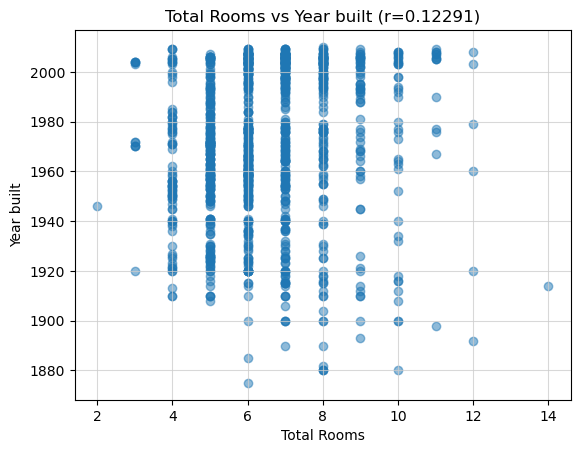

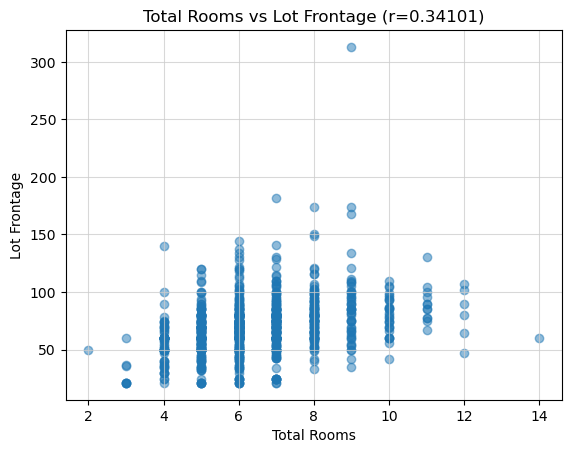



Variables con mayor correlación:
x = Total Rooms
y = Sale Price
r = 0.56471

x = Total Rooms
y = Overall Quality
r = 0.44429



In [110]:
printCorrelations(totalrooms,3)

### Construction date

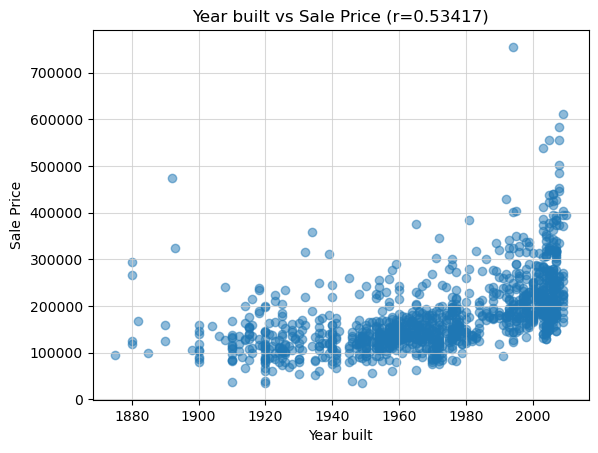

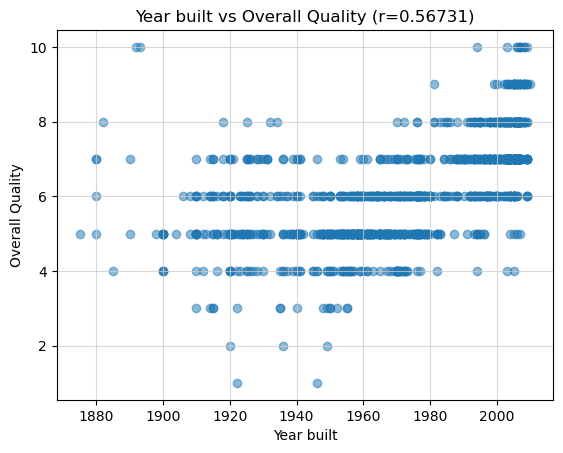

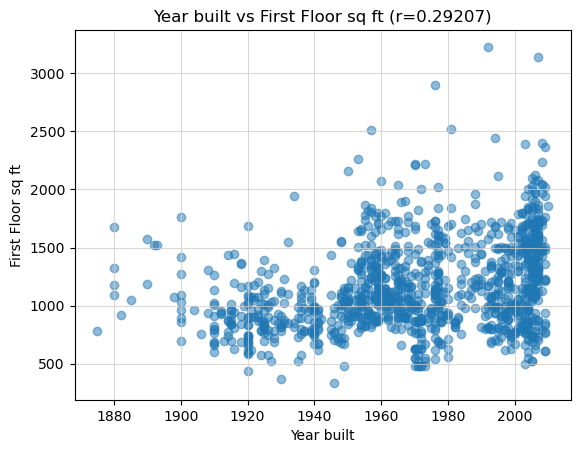

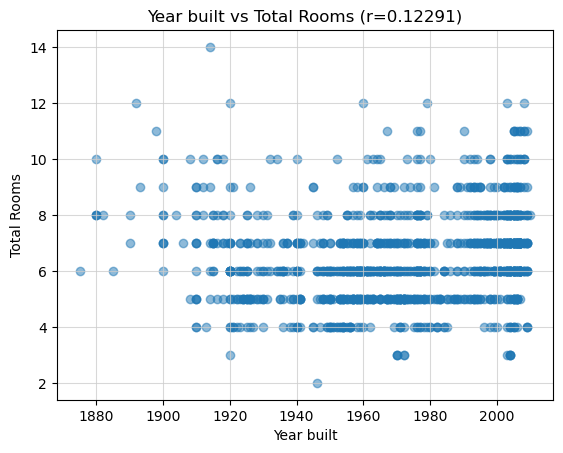

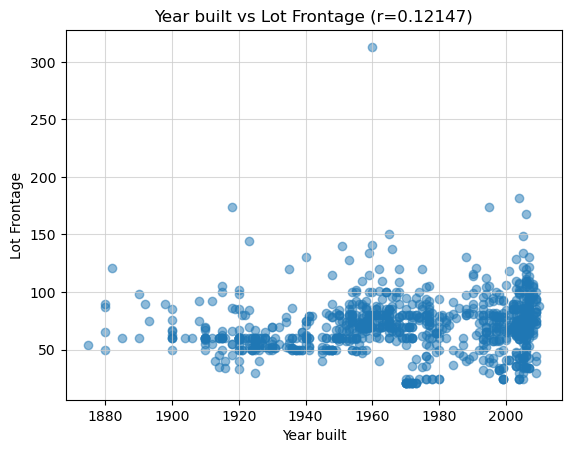



Variables con mayor correlación:
x = Year built
y = Overall Quality
r = 0.56731

x = Year built
y = Sale Price
r = 0.53417



In [111]:
printCorrelations(yearbuilt,4)

### Lot Frontage

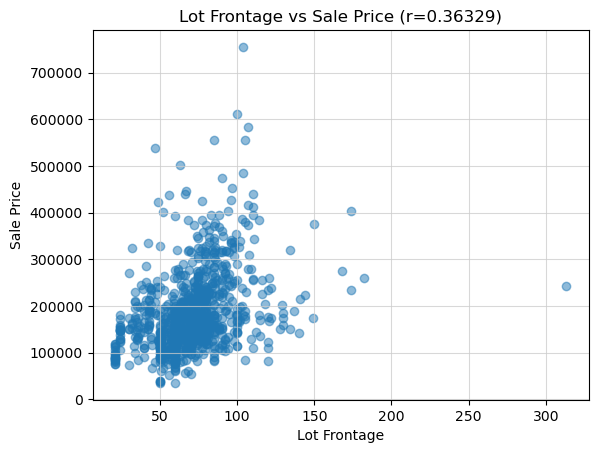

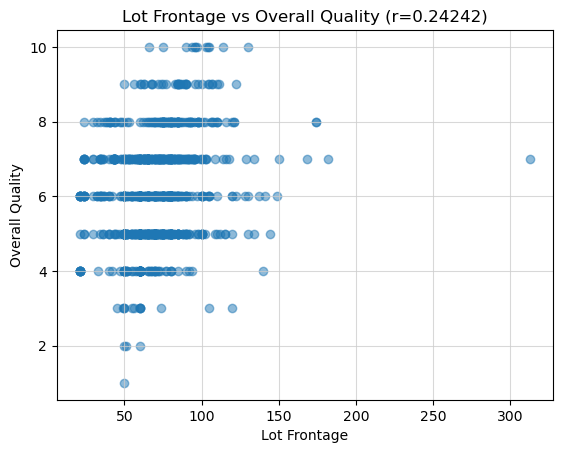

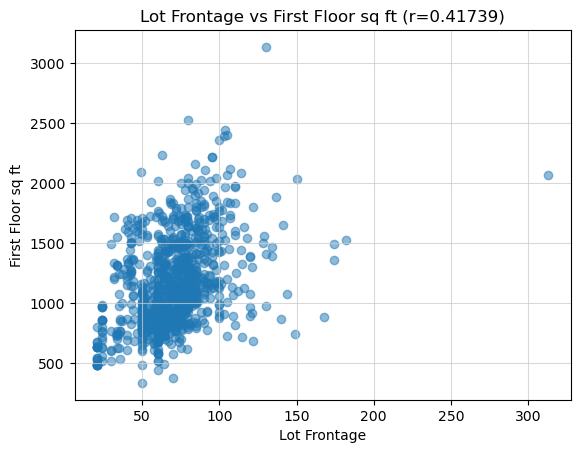

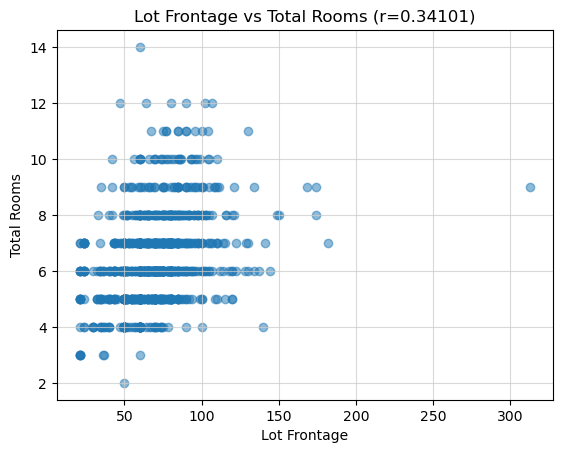

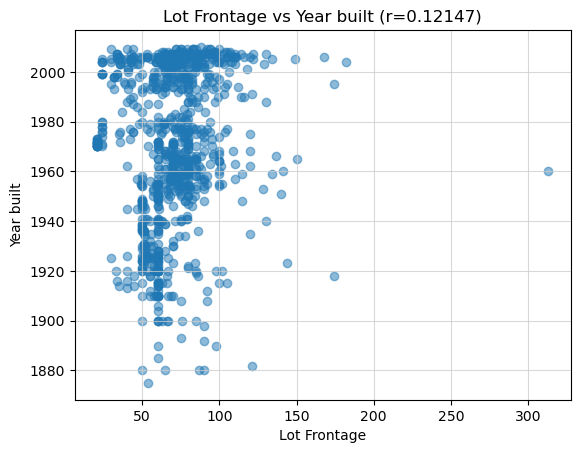



Variables con mayor correlación:
x = Lot Frontage
y = First Floor sq ft
r = 0.41739

x = Lot Frontage
y = Sale Price
r = 0.36329



In [112]:
printCorrelations(lotfrontage,5)

## Modelo Regresión Lineal

In [61]:
class ModeloRegresionLineal():

    # def __init__(self):
        

    def calcularPrediccion(self, vectorX, vectorY, epochs, imprimir_error_cada, alpha):
        # Parametros iniciales
        parametros = np.zeros(2)

        # Matriz x,1
        x = np.array([vectorX, np.ones(len(vectorX))])
        x = np.transpose(x)
        print(x)
        
        # Iteracion por cada epoch
        for e in range(0,epochs):
            # prediccion y
            predY = np.dot(x, parametros)
        
        return predY
    
    def calcularError(y,predY):
        print("test")
        
        


In [62]:
x = np.arange(1, 11, 1)
y = np.arange(1, 11, 1)
e = 15
error = 10
alpha = 0.1

modelo = ModeloRegresionLineal()
prediccion = modelo.calcularPrediccion(x,y,e,error,alpha)
print(prediccion)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [167]:
# saleprice = trainingData[:,0]
# overallquality = trainingData[:,1]
# firstfloorsqft = trainingData[:,2]
# totalrooms = trainingData[:,3]
# yearbuilt = trainingData[:,4]
# lotfrontage = trainingData[:,5]

# trainLR(overallquality, yearbuilt, 100, 10, 0.5)

(0,)


In [40]:
x = np.arange(1, 11, 1)
y = np.ones(10)
test = np.array([x,y])
test = np.transpose(test)
test1 = np.array([2,4])
test1 = np.transpose(test1)
result = np.dot(test,test1)
# result1 = np.dot(test1,test)

print(x)
print(overallquality)

# print(test)
# print(test1)
# print(result)
# print(result1)

# trainLR(np.arange(1, 11, 1), yearbuilt, 100, 10, 0.5)


[ 1  2  3  4  5  6  7  8  9 10]
[7. 6. 7. ... 7. 8. 6.]
